<a href="https://colab.research.google.com/github/seenu-g/school_of_ai/blob/master/chap13/YoloV3Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Check out https://github.com/theschoolofai/YoloV3 .Copy contents to the same under /content/gdrive/My Drive/school_of_ai/chap13/

In [49]:
#https://github.com/theschoolofai/YoloV3.git
# mount gdrive and unzip data
from google.colab import drive
import sys
%load_ext autoreload
%autoreload 2
drive.mount('/content/gdrive',force_remount=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/gdrive


In [77]:
import sys
import os
folder = '/content/gdrive/My Drive/school_of_ai/chap13/'
os.chdir(folder)
print(os.getcwd()) 
for items in os.listdir(folder):
   print(items)
sys.path.append(folder)

/content/gdrive/My Drive/school_of_ai/chap13
annotations
YoloV3
YoloV3Sample.ipynb
runs
results.png
train_batch0.png
test_batch0.png
results.txt


In [84]:
ls YoloV3/data

coco.names  customdata/  old_data/  samples/  smalcoco/


In [80]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [0]:
#!python YoloV3/train.py  --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Rename "customdata" folder as "old_data". Make corresponding change in custom.data and change.txt

In [85]:
!python YoloV3/train.py --data YoloV3/data/old_data/custom.data --single-cls --cfg YoloV3/cfg/yolov3-spp.cfg  --weights YoloV3/weights/yolov3-spp-ultralytics.pt --batch 10 --cache  --epochs 30 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='YoloV3/cfg/yolov3-spp.cfg', data='YoloV3/data/old_data/custom.data', device='', epochs=30, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=True, weights='YoloV3/weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-23 20:21:06.499992: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 1019.32it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 93.50it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 

In [0]:
#!python YoloV3/detect.py --conf-thres 0.1 --output out_out

Rename "customdata" folder as "old_data". Make corresponding change in custom.data and custom.txt

In [86]:
!python YoloV3/detect.py --classes 1 --cfg YoloV3/cfg/yolov3-spp.cfg --names YoloV3/data/old_data/custom.names --weights YoloV3/weights/last.pt --source YoloV3/data/old_data/test_images --conf-thres 0.1 --output YoloV3/out_out

Namespace(agnostic_nms=False, augment=False, cfg='YoloV3/cfg/yolov3-spp.cfg', classes=[1], conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='YoloV3/data/old_data/custom.names', output='YoloV3/out_out', save_txt=False, source='YoloV3/data/old_data/test_images', view_img=False, weights='YoloV3/weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/18 YoloV3/data/old_data/test_images/img001.jpg: 512x512 Done. (0.021s)
image 2/18 YoloV3/data/old_data/test_images/img002.jpg: 320x512 Done. (0.017s)
image 3/18 YoloV3/data/old_data/test_images/img003.jpg: 384x512 Done. (0.019s)
image 4/18 YoloV3/data/old_data/test_images/img004.jpg: 320x512 Done. (0.017s)
image 5/18 YoloV3/data/old_data/test_images/img005.jpg: 320x512 Done. (0.015s)
image 6/18 YoloV3/data/old_data/test_images/img006.jpg: 384x512 Done. (0.018s)
image 7/1

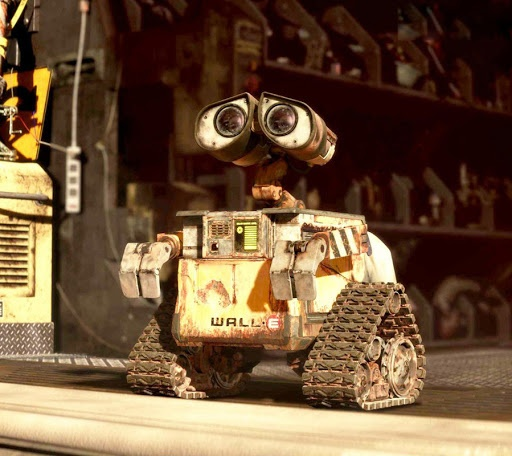

In [87]:
Image(filename='YoloV3/out_out/img001.jpg', width=600)

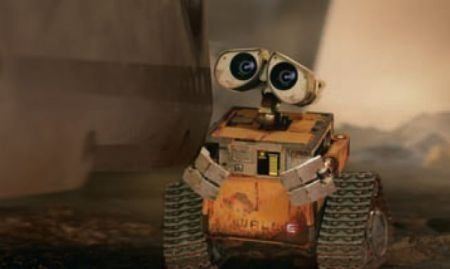

In [88]:
Image(filename='YoloV3/out_out/img002.jpg', width=600)

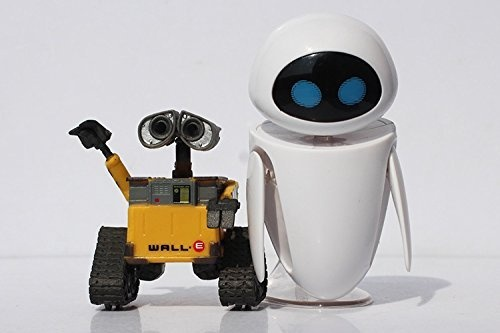

In [89]:
Image(filename='YoloV3/out_out/img003.jpg', width=600)

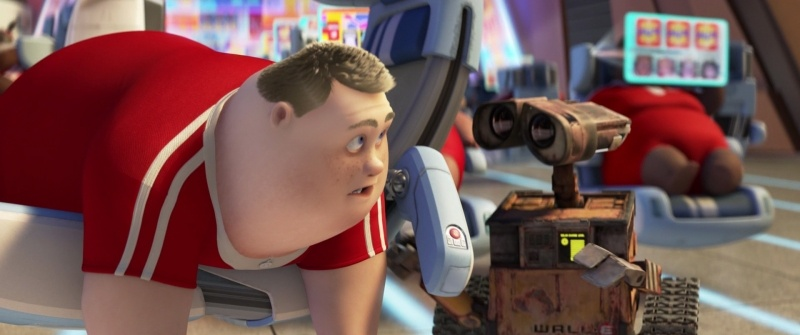

In [90]:
Image(filename='YoloV3/out_out/img020.jpg', width=600)